11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.8275 - loss: 0.5707 - val_accuracy: 0.9797 - val_loss: 0.0605
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9595 - loss: 0.1313 - val_accuracy: 0.9865 - val_loss: 0.0423
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9708 - loss: 0.0936 - val_accuracy: 0.9910 - val_loss: 0.0288
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9764 - loss: 0.0786 - val_accuracy: 0.9928 - val_loss: 0.0218
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9779 - loss: 0.0736 - val_accuracy: 0.9933 - val_loss: 0.0208
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9809 - loss: 0.0646 - val_accuracy: 0.9930 - val_loss: 0.0198
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9805 - loss: 0.0631 - val_accuracy: 0.9924 - val_loss: 0.0219
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9818 - loss: 0.0611 - val_accurac


✅ Test Accuracy: 99.50%


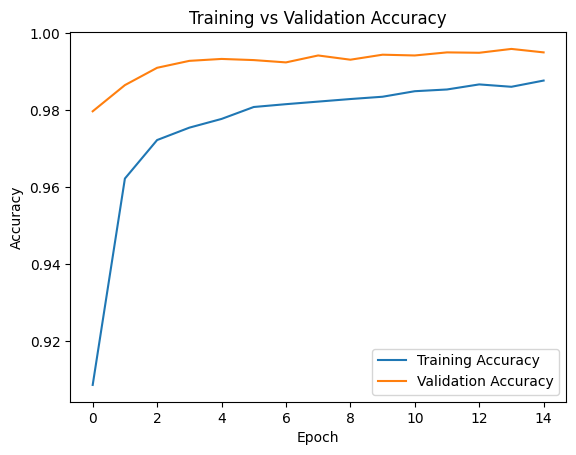

In [1]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load MNIST Dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocessing
X_train = X_train.reshape(-1,28,28,1).astype('float32') / 255.0
X_test = X_test.reshape(-1,28,28,1).astype('float32') / 255.0

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

# Build Better CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=15,
                    validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\n✅ Test Accuracy: {test_acc*100:.2f}%')

# Save the Model
model.save('saved_model/advanced_mnist_cnn_model.h5')

# Plot Accuracy Graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ---------------------------------
# Extra: Predict Custom Image
# ---------------------------------
def predict_custom_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))
    img = img.reshape(1,28,28,1).astype('float32') / 255.0
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    print(f"✅ Predicted Digit: {predicted_class}")

In [3]:
model.save('saved_model/advanced_mnist_cnn_model.keras')


In [4]:
# Load the model from the file
loaded_model = tf.keras.models.load_model('saved_model/advanced_mnist_cnn_model.keras')


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 20 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [8]:
import requests
import cv2
import numpy as np
from io import BytesIO

def predict_custom_image(image_url):
    # Step 1: Download the image from the URL
    response = requests.get(image_url)
    img_array = np.asarray(bytearray(response.content), dtype=np.uint8)

    # Step 2: Convert byte array to image using OpenCV
    img = cv2.imdecode(img_array, -1)  # -1 means the image is loaded as is (no color conversion)

    # Step 3: Preprocess the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if it's not
    img = cv2.resize(img, (28, 28))  # Resize to 28x28 for MNIST model
    img = img.reshape(1, 28, 28, 1).astype('float32') / 255.0  # Normalize

    # Step 4: Predict using the loaded model
    prediction = loaded_model.predict(img)
    predicted_class = np.argmax(prediction)

    print(f"✅ Predicted Digit: {predicted_class}")

# Example Usage with a URL
image_url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240430155943/download-(39).png'
predict_custom_image(image_url)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
✅ Predicted Digit: 7


In [9]:
from google.colab import files
files.download('saved_model/advanced_mnist_cnn_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>